In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

In [2]:
Cars = glob.glob('Cars/*.jpg')
Helicopter = glob.glob('Helicopter/*.jpeg')
Doraemon = glob.glob('Doraemon/*.jpg')
Cartoon = glob.glob('Cartoon/*.jpg')

In [3]:
image = []
label = []

for i in Cars:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in Helicopter:
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in Doraemon:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in Cartoon:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

In [4]:
label_names = {0:'Cars',1:'Helicopter',2:'Doraemon',3:'Cartoon'}

In [5]:
image, label = shuffle(image, label)

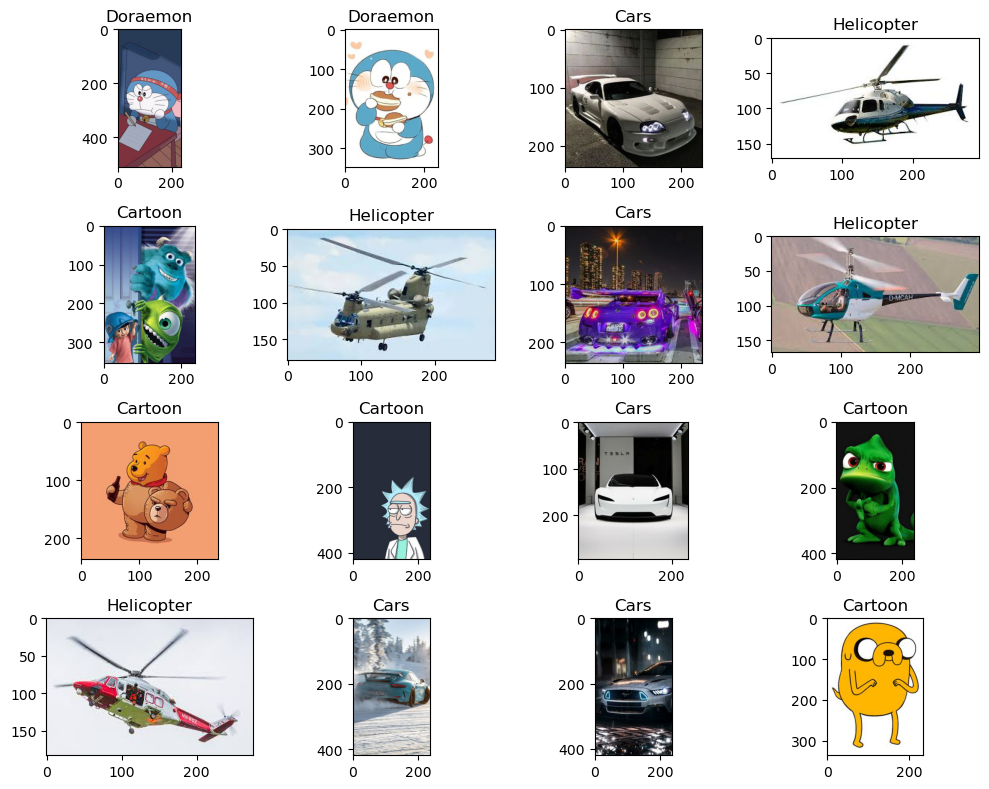

In [6]:
plt.figure(figsize = (10,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

In [7]:
for i in range(10):
    print(image[i].shape)

(510, 236, 3)
(346, 235, 3)
(236, 236, 3)
(171, 295, 3)
(354, 236, 3)
(178, 283, 3)
(236, 236, 3)
(168, 300, 3)
(236, 236, 3)
(419, 236, 3)


In [8]:
X = []

for i in image:
    X.append(resize(i, (500,500,3)))

In [9]:
X = np.array(X)

In [10]:
y = np.array(label)

In [11]:
d1, d2, d3, d4 = X.shape

In [12]:
X = X.reshape((d1, d2*d3*d4))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC()

In [17]:
%time model.fit(X_train, y_train)

CPU times: total: 1min 31s
Wall time: 1min 15s


SVC()

In [18]:
%time y_pred = model.predict(X_test)

CPU times: total: 1min 37s
Wall time: 1min 15s


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(y_test,y_pred)

0.7272727272727273

<Axes: >

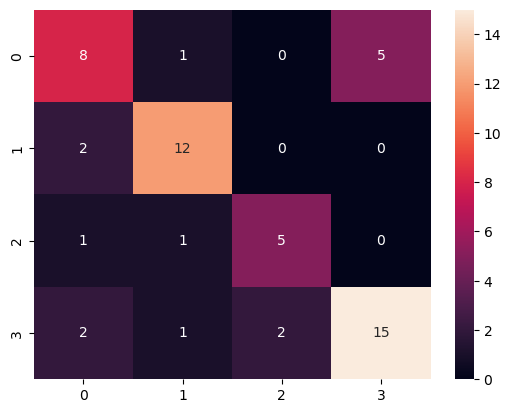

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.80      0.86      0.83        14
           2       0.71      0.71      0.71         7
           3       0.75      0.75      0.75        20

    accuracy                           0.73        55
   macro avg       0.72      0.72      0.72        55
weighted avg       0.72      0.73      0.73        55

